# Декомпозиция проекта "Телеком: поиск клиентов с неоптимальными тарифами".

## Введение.

1. **Описание проекта:** Наш заказчик коммерческий директор компании "НуПозвони" — провайдер виртуальной телефонии. Его клиенты — колл-центры (юр. лица). Заказчик озадачен тем, что на рынок вышел конкурент. Конкуренты предлагают более выгодные тарифы чем у них. Заказчик сообщил что часть клиентов расходуют тарифы не эффективно (переплачивают). Руководство компании боятся что клиенты могут уйти к конкуренту, и что потеряют клиентскую базу. Заказчик попросил посмотреть действительно ли есть такие клиенты, которые переплачивают на своих тарифах. Нужно найти клиентов с неоптимальными тарифами. 

1. **Цель проекта:** Для предотвращения оттока клиентов, нужно провести ежеквартальный мониторинг клиентов с неоптимальными тарифами, которые экономически неэффективно используют услуги на своих тарифах и могут снизить свои расходы, если перейдут на более выгодными для них тарифы, и оценить изменения выручки компании. Такой мониторинг будем делать систематически, раз в три месяца;

1. **Задачи:** Для достижения цели нужно определить клиентов с неоптимальными тарифами, искать клиенту наиболее выгодные тарифы. Нам нужно также изучить потери в выручке,если все клиенты перейдут на выгодные тарифы.

1. **Итоговый результат:** По результатам нашего анализа, информация о клиентах которые неэффективно используют свои тарифы будет передана менеджерам коммерческого департамента. Они в свою очередь будут делать обзвон этих клиентов и предлагать им сменить тарифный план. Результатом должно стать сохранение активных клиентов, чтобы в долгосрочной перспективе получать от них выгоду.

**Ссылка на презентацию:** https://disk.yandex.kz/i/feGlv0dGO4iVLA

**Ссылка на дашборд:** https://public.tableau.com/app/profile/alexei1573/viz/Telecom_16699893688010/Dashboard1?publish=yes


1. Характеристика **данных:** В работу поступило два датасета, которые характеризуют использование услуг «НуПозвони».

датасет `telecom_dataset.csv`
- `user_id` - идентификатор клиента,
- `date` - дата статистики;
- `direction` - направление вызовов: out — исходящий вызов, in — входящий; 
- `internal` - маркер внутренних и внешних вызовов; вызовы между сотрудниками одного колл-центра называют внутренними, остальные — внешними.
- `operator_id` - идентификатор оператора;
- `is_missed_call` - маркер пропущенных вызовов;
- `calls_count` - количество звонков;
- `call_duration` - длительность **всех звонков** без учёта времени ожидания;
- `total_call_duration` - длительность **всех звонков** с учётом времени ожидания.

датасет `telecom_dataset.csv`
- `user_id` — идентификатор клиента;
- `tariff_plan` — тарифный план клиента;
- `date_start` — дата регистрации клиента в сервисе.

В Телекоме действуют следующие тарифные планы:

|   Тарифный план    |     Ежемесячная плата    |     Входящие    |     Исходящие звонки* внутри сети**|     Исходящие   звонки*, кроме внутренних    | Плата за 1 оператора |
|:---:|:---:|:---:|:---:|:---:|:---:|
|     А    |     5 000 ₽    |     0    |     0.10 ₽/мин.    |     0.4 ₽/мин.    | 100 ₽/оператор |
|     В    |     2 000 ₽    |     0    |     0.15 ₽/мин.    |     0.5 ₽/мин.    | 100 ₽/оператор |
|     С    |     1 000 ₽    |     0    |     0.30 ₽/мин.    |     0.7 ₽/мин.    | 100 ₽/оператор |


## Структура проекта.

1. Описание проекта (декомпозиция).
1. Описание данных.
1. Загрузка данных и изучение общей информации.
1. Выполнение предобработки данных. Выявление дубликатов и пропусков, приведение всех столбцов к одному регистру, анализ на аномальные значения.
1. Исследовательский анализ данных. Определение клиентов с неоптимальными тарифами. Создать клиенту наиболее выгодный ему тариф с минимизацией потерь компании. 
1. Выдвигаем гипотезы: Проверка различия в средней выручке при смене тарифа на оптимальный тариф. Добавить новый тариф, который устроит и клиента и заказчика. 
1. Делаем выводы.
1. Предоставляем заказчику презентацию.

## Загрузка данных и изучение общей информации.

In [1]:
#Загрузим библиотеки, которые понадобятся

import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns 
from numpy import median
from io import BytesIO
import requests
import re



import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
cm = sns.light_palette("red", as_cmap=True)

### Загружаем данные из двух датасетов

In [2]:
import os
pth1 = '/Users/alexbay/Desktop/Финальный проект/'
pth2 = '/datasets/'
if os.path.exists(pth1):
    dataset = pd.read_csv(pth1 + 'telecom_dataset.csv')
    clients = pd.read_csv(pth1 + 'telecom_clients.csv')
elif os.path.exists(pth2):
    dataset = pd.read_csv(pth2 + 'telecom_dataset.csv')
    clients = pd.read_csv(pth2 + 'telecom_clients.csv')
else:
    print('Something is wrong')

### Изучаем данные

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [4]:
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [5]:
dataset.isna().sum()

user_id                0   
date                   0   
direction              0   
internal               117 
operator_id            8172
is_missed_call         0   
calls_count            0   
call_duration          0   
total_call_duration    0   
dtype: int64

In [6]:
dataset.isna().sum()*100/len(dataset)

user_id                0.000000 
date                   0.000000 
direction              0.000000 
internal               0.217061 
operator_id            15.160847
is_missed_call         0.000000 
calls_count            0.000000 
call_duration          0.000000 
total_call_duration    0.000000 
dtype: float64

In [7]:
for row in dataset:
    print(dataset[row].value_counts())

168187    2580
166658    2107
167497    1405
167626    1311
166916    1308
          ... 
166584    1   
167981    1   
168578    1   
168013    1   
166554    1   
Name: user_id, Length: 307, dtype: int64
2019-11-25 00:00:00+03:00    1220
2019-11-28 00:00:00+03:00    1198
2019-11-21 00:00:00+03:00    1186
2019-11-27 00:00:00+03:00    1180
2019-11-22 00:00:00+03:00    1176
                             ... 
2019-08-03 00:00:00+03:00    9   
2019-08-02 00:00:00+03:00    8   
2019-08-10 00:00:00+03:00    7   
2019-08-04 00:00:00+03:00    4   
2019-08-11 00:00:00+03:00    2   
Name: date, Length: 119, dtype: int64
out    31917
in     21985
Name: direction, dtype: int64
False    47621
True     6164 
Name: internal, dtype: int64
901884.0    348
901880.0    337
893804.0    325
885876.0    319
891410.0    290
           ... 
911152.0    1  
891250.0    1  
962904.0    1  
940512.0    1  
937772.0    1  
Name: operator_id, Length: 1092, dtype: int64
False    30334
True     23568
Name: is_missed

In [8]:
dataset.duplicated().sum()

4900

In [9]:
dataset.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


dataset состоит из 9 столбцов и 53902 строк. Пропущенные значения в operator_id(15.16%) и internal(0.22%), дубликатов 4900, нулей call_duration(23263) и total_call_duration(1320).

In [10]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [11]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [12]:
clients.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [13]:
for row in clients: 
    print(clients[row].value_counts()) 

166713    1
168237    1
167095    1
167077    1
167929    1
         ..
167729    1
167630    1
166408    1
166574    1
166565    1
Name: user_id, Length: 732, dtype: int64
C    395
B    261
A    76 
Name: tariff_plan, dtype: int64
2019-09-24    24
2019-10-09    20
2019-10-07    19
2019-08-29    18
2019-09-18    18
              ..
2019-10-20    1 
2019-09-21    1 
2019-08-31    1 
2019-10-19    1 
2019-10-26    1 
Name: date_start, Length: 73, dtype: int64


In [14]:
clients.duplicated().sum()

0

In [15]:
clients.describe()

,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000


Изменяем тип данных в столбцах date и date_start

clients состоит из 3 столбцов и 732 строк. Пропущенных значений нет, полных дубликатов нет, нулей нет.

## Предобработка данных

Преобразуем нужные столбцы в нужные типы

In [16]:
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y.%m.%d')
dataset['date'] = pd.to_datetime(dataset['date'].dt.tz_convert(None))
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53785 non-null  object        
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB


In [17]:
clients['date_start'] = pd.to_datetime(clients['date_start'], format='%Y.%m.%d')
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [18]:
dataset['operator_id'] = dataset['operator_id'].astype('Int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53785 non-null  object        
 4   operator_id          45730 non-null  Int64         
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), int64(4), object(2)
memory usage: 3.4+ MB


Удаляем дубликаты

In [19]:
dataset = dataset.drop_duplicates().reset_index(drop=True)
dataset.duplicated().sum()

0

Смотрим пропуски в столбце operator_id

In [20]:
dataset['operator_id'].isna().sum()

7456

In [21]:
nan = dataset[dataset['operator_id'].isna() == True]
nan.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-03 21:00:00,in,False,<NA>,True,2,0,4
7,166377,2019-08-04 21:00:00,in,False,<NA>,True,6,0,35
8,166377,2019-08-05 21:00:00,in,False,<NA>,True,4,0,62
16,166377,2019-08-06 21:00:00,in,False,<NA>,True,2,0,24
26,166377,2019-08-11 21:00:00,in,False,<NA>,True,2,0,34
28,166377,2019-08-12 21:00:00,in,False,<NA>,True,7,0,128
36,166377,2019-08-13 21:00:00,in,False,<NA>,True,1,0,3
71,166377,2019-08-21 21:00:00,in,False,<NA>,True,1,0,1
74,166377,2019-08-22 21:00:00,in,False,<NA>,True,2,0,47
79,166377,2019-08-23 21:00:00,in,False,<NA>,True,2,0,35


In [22]:
dataset[dataset['operator_id'].isna()]['date'].value_counts().head(10)

2019-10-27 21:00:00    128
2019-11-27 21:00:00    127
2019-11-11 21:00:00    125
2019-11-25 21:00:00    123
2019-11-06 21:00:00    123
2019-11-18 21:00:00    122
2019-11-19 21:00:00    122
2019-11-12 21:00:00    121
2019-11-24 21:00:00    121
2019-11-13 21:00:00    121
Name: date, dtype: int64

Смотрим кто из операторов работал в день с большим числом пропусков.

In [23]:
dataset[dataset['date']=='2019-10-27 21:00:00']['operator_id'].nunique()

328

Таких операторов 328

In [24]:
dataset[dataset['operator_id'].isna()]['internal'].value_counts()

False    7078
True     323 
Name: internal, dtype: int64

In [25]:
dataset[dataset['operator_id'].isna()]['direction'].value_counts()

in     7270
out    186 
Name: direction, dtype: int64

In [26]:
dataset[dataset['operator_id'].isna()]['is_missed_call'].value_counts()

True     7343
False    113 
Name: is_missed_call, dtype: int64

Большинство пропусков в внутренних, пропущенных и входящих вызовах.

Смотрим пропуски в столбце internal

In [27]:
dataset['internal'].isna().sum()

110

In [28]:
nan1 = dataset[dataset['internal'].isna() == True]
nan1.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
917,166405,2019-09-17 21:00:00,in,NaN,<NA>,True,1,0,59
996,166405,2019-09-30 21:00:00,in,NaN,<NA>,True,1,0,1
1705,166406,2019-08-19 21:00:00,in,NaN,<NA>,True,1,0,36
1761,166406,2019-09-01 21:00:00,in,NaN,879898,False,1,2,9
5645,166541,2019-09-25 21:00:00,in,NaN,908960,False,1,393,423


In [29]:
dataset[dataset['internal'].isna()]['operator_id'].value_counts()

921318    4
932798    3
931458    2
919204    2
919552    2
901880    2
903312    2
890404    2
919164    2
919790    2
944220    2
908960    1
906396    1
906406    1
906400    1
905432    1
935348    1
912684    1
906294    1
908082    1
919554    1
910018    1
908958    1
910540    1
893402    1
952948    1
923526    1
929332    1
921818    1
919206    1
945046    1
940658    1
958460    1
936514    1
944216    1
944222    1
936110    1
879898    1
940430    1
929424    1
958394    1
Name: operator_id, dtype: Int64

In [30]:
dataset[dataset['internal'].isna()]['is_missed_call'].value_counts()

True     56
False    54
Name: is_missed_call, dtype: int64

In [31]:
dataset[dataset['internal'].isna()]['direction'].value_counts()

in     108
out    2  
Name: direction, dtype: int64

Пропуски в столбце internal почти все входящие,половина пропущенных.Больше всего пропусков у оператора 921318(4),но в самом столбце с операторами много пропусков.

In [32]:
# Удаляем пропуски
dataset = dataset.dropna()

In [33]:
dataset.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

Посмотрим на длительность всех звонков. Переведем столбцы в минуты.Так как рабочий день у оператора не больше 12часов(720 минут),всё что больше это аномалия.

In [34]:
dataset['call_duration'] = (dataset['call_duration']/60).apply(np.ceil).astype('int')
dataset['total_call_duration'] = (dataset['total_call_duration']/60).apply(np.ceil).astype('int')
dataset.sort_values('total_call_duration', ascending=False).head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6318,166582,2019-09-24 21:00:00,out,False,885876,False,1230,2407,2770
6322,166582,2019-09-25 21:00:00,out,False,885876,False,843,2204,2449
6192,166582,2019-09-08 21:00:00,out,False,885876,False,1138,2019,2366
6266,166582,2019-09-17 21:00:00,out,False,885876,False,1013,2028,2335
6216,166582,2019-09-11 21:00:00,out,False,885876,False,696,2089,2311
6367,166582,2019-10-01 21:00:00,out,False,885876,False,995,2003,2289
6208,166582,2019-09-10 21:00:00,out,False,885876,False,946,1918,2212
6298,166582,2019-09-22 21:00:00,out,False,885876,False,1436,1726,2159
6434,166582,2019-10-08 21:00:00,out,False,885876,False,696,1953,2157
6278,166582,2019-09-19 21:00:00,out,False,885876,False,737,1908,2132


In [35]:
dataset.groupby(['date', 'user_id'])['total_call_duration', 'call_duration'].sum().\
                    sort_values('total_call_duration', ascending=False).head()

,,total_call_duration,call_duration
date,user_id,,
2019-09-30 21:00:00,167626,4879,3371
2019-10-02 21:00:00,167626,4825,3154
2019-10-08 21:00:00,166582,4760,3702
2019-10-03 21:00:00,167626,4639,3165
2019-09-24 21:00:00,166582,4609,3422


Исключим клиентов, которые разговаривают больше 12 часов в день. И создадим новую таблицу с названием na (not anomaly)

In [36]:
na = dataset.query('total_call_duration < 720')

In [37]:
na.sort_values('total_call_duration', ascending=False).head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6565,166582,2019-10-21 21:00:00,out,False,885876,False,222,639,709
5983,166582,2019-08-12 21:00:00,out,False,885890,False,308,586,679
6384,166582,2019-10-03 21:00:00,out,False,885890,False,338,568,670
6065,166582,2019-08-22 21:00:00,out,False,885876,False,329,559,660
6128,166582,2019-08-31 21:00:00,out,False,885876,False,229,583,654


Сравниваем

In [38]:
dataset['total_call_duration'].describe()

count    41491.000000
mean     22.554699   
std      79.812920   
min      0.000000    
25%      2.000000    
50%      5.000000    
75%      19.000000   
max      2770.000000 
Name: total_call_duration, dtype: float64

In [39]:
na['total_call_duration'].describe()

count    41381.000000
mean     19.219690   
std      40.594475   
min      0.000000    
25%      2.000000    
50%      5.000000    
75%      19.000000   
max      709.000000  
Name: total_call_duration, dtype: float64

Убрали 121 значения. Стало: среднее 17,медиана 4. Посмотрим на гистограмме и боксплоте.

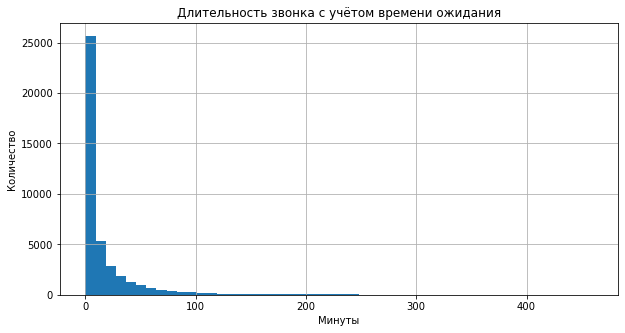

In [40]:
na.hist('total_call_duration',bins=50, range = (0, 460), figsize = (10,5))
plt.title('Длительность звонка с учётом времени ожидания')
plt.xlabel('Минуты') 
plt.ylabel('Количество')
plt.show()

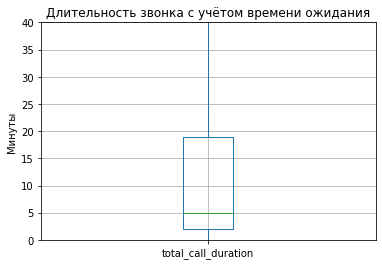

In [41]:
plt.ylim(0,40) 
na.boxplot(column = 'total_call_duration', showfliers = False)
plt.title('Длительность звонка с учётом времени ожидания')
plt.ylabel('Минуты')
plt.show()

Пик 2-15, медиана 4 минуты.

Добавляем колонки с месяцами

In [42]:
na['month'] = na['date'].astype('datetime64[M]')
clients['month_start'] = clients['date_start'].astype('datetime64[M]')

**Промежуточные выводы:**

Преобразовали типы, убрали часовой пояс. Удалили дубликаты и пропуски. Перевели столбцы с временем в минуты. Удалили клиентов, которые разговаривали аномально много. Добавили колонки с месяцами в таблицах.

## Исследовательский анализ данных

Смотрим на начало и конец периода

In [43]:
display(na['date'].min())
na['date'].max()

Timestamp('2019-08-01 21:00:00')

Timestamp('2019-11-27 21:00:00')

Данные за период 2019-08-02 - 2019-11-28 (почти 4 месяца)

In [44]:
clients.user_id.nunique()

732

In [45]:
clients['tariff_plan'].value_counts()

C    395
B    261
A    76 
Name: tariff_plan, dtype: int64

У нас 3 тарифа, клиенты больше всего используют тариф С. Посмотрим на графике.

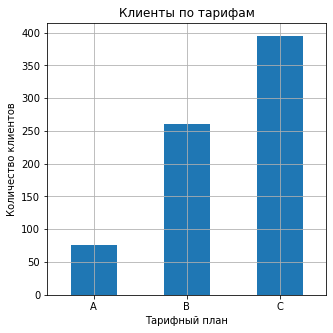

In [46]:
id_tariff = clients.groupby('tariff_plan').agg({'user_id':'nunique'})
ax = id_tariff.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=0)
plt.title('Клиенты по тарифам')
plt.xlabel('Тарифный план') 
plt.ylabel('Количество клиентов')
plt.show()

Теперь посмотрим клиентов по месяцам.

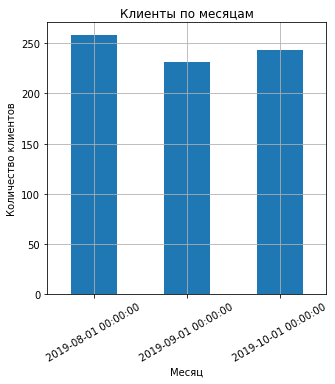

In [47]:
id_month = clients.groupby('month_start').agg({'user_id':'nunique'})
ax = id_month.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=30)
plt.title('Клиенты по месяцам')
plt.xlabel('Месяц') 
plt.ylabel('Количество клиентов')
plt.show()

In [48]:
id_month.style.background_gradient(cmap=cm)

,user_id
month_start,
2019-08-01 00:00:00,258
2019-09-01 00:00:00,231
2019-10-01 00:00:00,243


In [49]:
month_id = clients.groupby(['month_start','tariff_plan'])['user_id'].count().unstack()
month_id.style.background_gradient(cmap=cm)

tariff_plan,A,B,C
month_start,,,
2019-08-01 00:00:00,26,91,141
2019-09-01 00:00:00,16,77,138
2019-10-01 00:00:00,34,93,116


Тариф А больше всего подключили в 10 месяце,тариф В в 10 и 8, тариф С в 8 и 9.По общему числу подключений больше в 8 месяце.

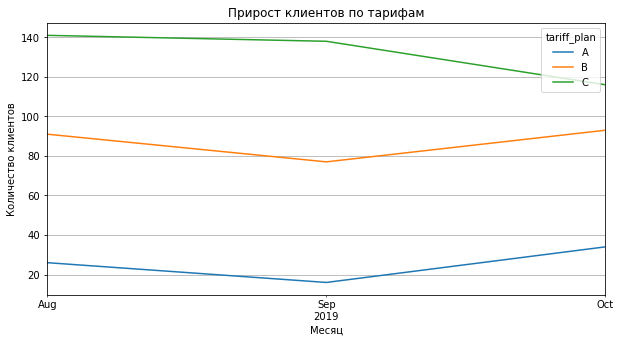

In [50]:
ax = month_id.plot(kind='line', figsize=(10,5), grid=True)
plt.title('Прирост клиентов по тарифам')
plt.xlabel('Месяц') 
plt.ylabel('Количество клиентов')
plt.show()

В данных видны только 3 месяца с август, сентябрь и октябрь, ноября в них нет, получается клиенты не регистрировались в ноябре. В сентябре во всех тарифах виден спад, в октябре спад продолжатеся в тарифе С, а в тарифах А и В идет прирост.

In [51]:
na.operator_id.nunique()

1092

Операторов 1092.

In [52]:
id_month = na.groupby('month').agg({'user_id':'nunique'})
id_month.style.background_gradient(cmap=cm)

,user_id
month,
2019-08-01 00:00:00,68
2019-09-01 00:00:00,159
2019-10-01 00:00:00,240
2019-11-01 00:00:00,244


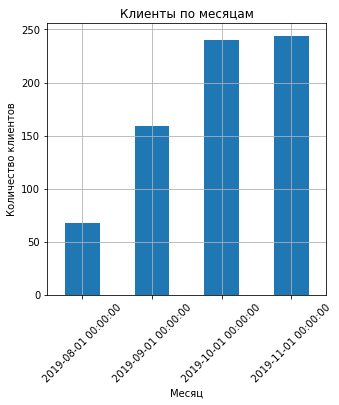

In [53]:
ax = id_month.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Клиенты по месяцам')
plt.xlabel('Месяц') 
plt.ylabel('Количество клиентов')
plt.show()

В октябре и ноябре больше всего клиентов.

In [54]:
id_direction = na.groupby('direction').agg({'user_id':'nunique'})
id_direction

,user_id
direction,
in,273
out,222


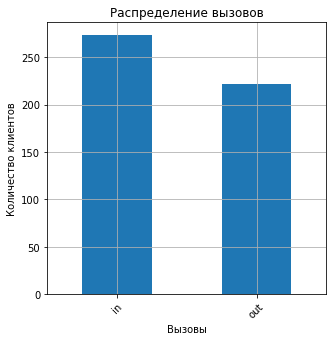

In [55]:
ax = id_direction.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Распределение вызовов')
plt.xlabel('Вызовы') 
plt.ylabel('Количество клиентов')
plt.show()

307 входящий вызов, 222 исходящих вызовов по клиентам.

In [56]:
id_internal = na.groupby('internal').agg({'user_id':'nunique'})
id_internal

,user_id
internal,
False,290
True,160


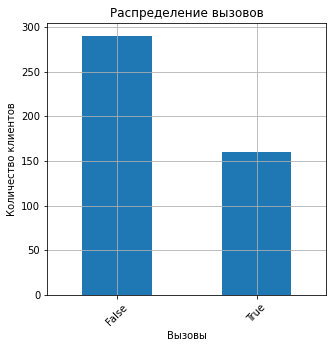

In [57]:
ax = id_internal.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Распределение вызовов')
plt.xlabel('Вызовы') 
plt.ylabel('Количество клиентов')
plt.show()

Внутренних вызовов 180, внешних 306.

In [58]:
is_missed_call = na.groupby('is_missed_call').agg({'user_id':'nunique'})
is_missed_call

,user_id
is_missed_call,
False,287
True,234


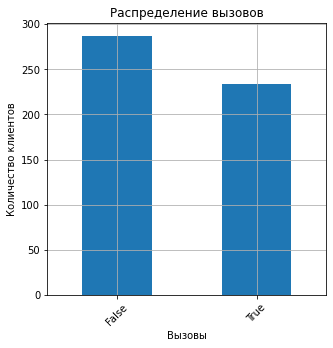

In [59]:
ax = is_missed_call.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Распределение вызовов')
plt.xlabel('Вызовы') 
plt.ylabel('Количество клиентов')
plt.show()

Принятых вызовов 287, пропущенных 305.

In [60]:
total_call_duration = na.groupby(['date', 'operator_id'])['total_call_duration', 'call_duration'].sum()
total_call_duration.describe()

,total_call_duration,call_duration
count,19645.000000,19645.000000
mean,40.485111,30.283176
std,65.574802,47.915749
min,0.000000,0.000000
25%,4.000000,3.000000
50%,16.000000,12.000000
75%,50.000000,37.000000
max,829.000000,657.000000


Рассмотрим время ожидания вызова.

In [61]:
na['waiting_duration_mean'] = (na['total_call_duration'] - na['call_duration']) / na['calls_count']
na.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,waiting_duration_mean
1,166377,2019-08-04 21:00:00,out,True,880022,True,3,0,1,2019-08-01,0.333333
2,166377,2019-08-04 21:00:00,out,True,880020,True,1,0,1,2019-08-01,1.000000
3,166377,2019-08-04 21:00:00,out,True,880020,False,1,1,1,2019-08-01,0.000000
4,166377,2019-08-04 21:00:00,out,False,880022,True,3,0,1,2019-08-01,0.333333
5,166377,2019-08-04 21:00:00,out,False,880020,False,2,1,1,2019-08-01,0.000000


In [62]:
print('минимальное среднее время ожидания вызова:', na['waiting_duration_mean'].min())
print('максимальное среднее время ожидания вызова:', na['waiting_duration_mean'].max())

минимальное среднее время ожидания вызова: 0.0
максимальное среднее время ожидания вызова: 4.0


In [63]:
na['one_call_duration'] = na['call_duration'] / na['calls_count']
na.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,waiting_duration_mean,one_call_duration
1,166377,2019-08-04 21:00:00,out,True,880022,True,3,0,1,2019-08-01,0.333333,0.0
2,166377,2019-08-04 21:00:00,out,True,880020,True,1,0,1,2019-08-01,1.000000,0.0
3,166377,2019-08-04 21:00:00,out,True,880020,False,1,1,1,2019-08-01,0.000000,1.0
4,166377,2019-08-04 21:00:00,out,False,880022,True,3,0,1,2019-08-01,0.333333,0.0
5,166377,2019-08-04 21:00:00,out,False,880020,False,2,1,1,2019-08-01,0.000000,0.5


In [64]:
print('минимальная длительность одного вызова без учета времени ожидания ответа:', na['one_call_duration'].min())
print('максимальное длительность одного вызова без учета времени ожидания ответа:', na['one_call_duration'].max())

минимальная длительность одного вызова без учета времени ожидания ответа: 0.0
максимальное длительность одного вызова без учета времени ожидания ответа: 60.0


''

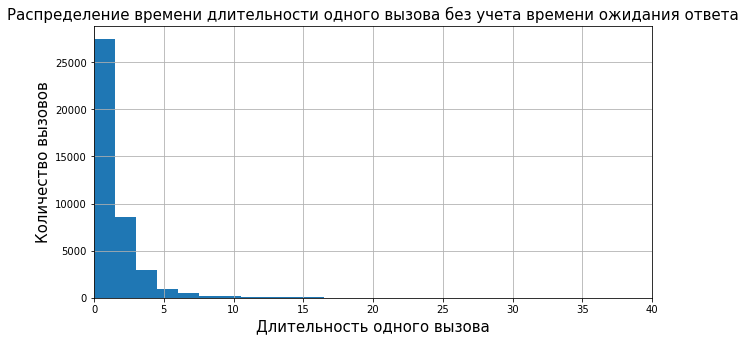

In [65]:
plt.figure(figsize=(10, 5))
na['one_call_duration'].hist(bins=40)
plt.xlim(0, 40)
plt.title('Распределение времени длительности одного вызова без учета времени ожидания ответа', fontsize=15)
plt.xlabel('Длительность одного вызова', fontsize=15)
plt.ylabel('Количество вызовов', fontsize=15);
;

Длительность звонка с учётом времени ожидания среднее 44 мин, медиана 17 мин, максимум 1394мин. Длительность звонка без учёта времени ожидания среднее 33 мин,медиана 13 мин, максимум 1043мин.



Из таблицы clients:

Данные за период 2019-08-02 - 2019-11-28(почти 4 месяца). В таблице с тарифами 732 клиента,а со звонками 307 клиентов.Видимо у нас какая-то выборка. Лидер по количеству клиентов тариф С. Тариф А больше всего подключили в 10 месяце,тариф В в 10 и 8, тариф С в 8 и 9.По общему числу подключений больше в 8 месяце. В данных 3 месяца с августа по октябрь,ноября в них нет, получается клиенты регистрировались только первые три месяца. В сентябре во всех тарифах виден спад, в октябре спад продолжатеся в тарифе С, а в тарифах А и В идет прирост.

Из таблицы na:

Всего операторов 1092. В октябре(275) и ноябре(261) большее количество клиентов. В сентябре 177,в августе 86. 307 входящий вызов, 222 исходящих вызовов по клиентам. Внутренних вызовов 180,внешних 306. Принятых вызовов 287,пропущенных 305.

Время ожидания вызова:
- минимальное среднее время ожидания вызова: 0.0
- максимальное среднее время ожидания вызова: 8.0 мин.

- минимальная длительность одного вызова без учета времени ожидания ответа: 0.0
- максимальное длительность одного вызова без учета времени ожидания ответа: 60.0 мин.

In [66]:
na.groupby('is_missed_call').agg({'calls_count':'sum'})

,calls_count
is_missed_call,
False,361522
True,269704


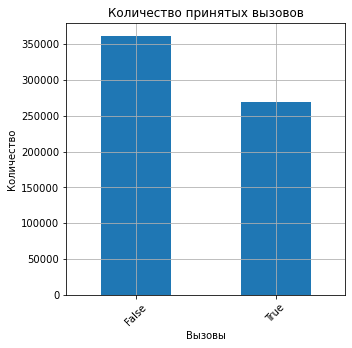

In [67]:
ax = na.groupby('is_missed_call').agg({'calls_count':'sum'}).plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Количество принятых вызовов')
plt.xlabel('Вызовы') 
plt.ylabel('Количество')
plt.show()


**Рассмотрим клиентов, которые ушли**

In [68]:
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')

In [69]:
dataset['month'] = dataset['date'].dt.month

In [70]:
month_user = dataset.groupby('user_id').agg({'month':'max'})\
                                             .rename(columns={'month':'month_user'})\
                                             .reset_index()
id_10 = month_user.query('month_user <= 10')
len(id_10)

46

In [71]:
id_46 = id_10.merge(clients, on='user_id', how='left')

In [72]:
id_46['user_id']

0     166399
1     166481
2     166507
3     166533
4     166585
5     166609
6     166666
7     166671
8     166726
9     166727
10    166874
11    166884
12    166908
13    166936
14    166941
15    166946
16    166955
17    166958
18    166993
19    167009
20    167011
21    167012
22    167053
23    167110
24    167113
25    167122
26    167124
27    167125
28    167130
29    167141
30    167144
31    167189
32    167244
33    167285
34    167288
35    167474
36    167530
37    167551
38    167626
39    167645
40    167682
41    167759
42    167819
43    168025
44    168093
45    168307
Name: user_id, dtype: int64

In [73]:
month_id.style.background_gradient(cmap=cm)

tariff_plan,A,B,C
month_start,,,
2019-08-01 00:00:00,26,91,141
2019-09-01 00:00:00,16,77,138
2019-10-01 00:00:00,34,93,116


In [74]:
tariff_id = id_46.groupby(['month_start','tariff_plan'])['user_id'].count().unstack()
tariff_id.style.background_gradient(cmap=cm)

tariff_plan,A,B,C
month_start,,,
2019-08-01 00:00:00,2.000000,6.000000,15.000000
2019-09-01 00:00:00,2.000000,8.000000,9.000000
2019-10-01 00:00:00,nan,2.000000,2.000000


In [75]:
tariff = id_46.groupby('tariff_plan').agg({'user_id':'nunique'})
tariff

,user_id
tariff_plan,
A,4
B,16
C,26


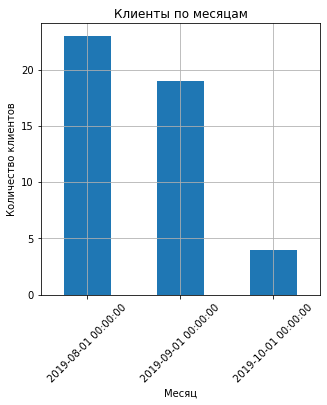

In [76]:
month = id_46.groupby('month_start').agg({'user_id':'nunique'})
ax = month.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Клиенты по месяцам')
plt.xlabel('Месяц') 
plt.ylabel('Количество клиентов')
plt.show()

In [77]:
month

,user_id
month_start,
2019-08-01,23
2019-09-01,19
2019-10-01,4


Из 46 ушедших:

- Тариф А(5000₽) в 8 месяце из 26 клиентов ушли 2,в 9 месяце пришли 16 и 2 ушли.Всего 4
- Тариф В(2000₽) в 8 месяце из 91 клиентов ушли 6,в 9 месяце пришли 77 и 8 ушли,в 10 месяце пришли 93 и 2 ушли.Всего 16.
- Тариф С(1000₽) в 8 месяце из 141 клиентов ушли 15,в 9 месяце пришли 138 и 9 ушли,в 10 месяце пришли 116 и 2 ушли.Всего 26.
Больше всего клиентов ушло в 8 месяце(23),потом в 9(19) и в 8(4).

In [78]:
tmp = dataset.copy()
tmp = tmp.merge(clients, on = "user_id")
tmp['month'] = pd.to_datetime(tmp['date']).dt.date.astype('datetime64[M]')
tmp['month_start'] = tmp['date_start'].astype('datetime64[M]')
tmp['lifetime'] = (tmp['month'] - tmp['month_start']) / np.timedelta64(1,'M')
tmp['lifetime'] = tmp['lifetime'].round().astype('int')

(tmp
 .groupby(['month_start','lifetime']).agg(users  = ('user_id', 'nunique')).reset_index()
 .merge(tmp.groupby('month_start').agg(cohort_size = ('user_id', 'nunique')).reset_index(), 
               on = 'month_start', how = 'left')
 .assign(retention = lambda x : x['users'] / x['cohort_size'])
).pivot_table(index='month_start', columns='lifetime', values='retention', aggfunc = 'mean')

lifetime,-1,0,1,2,3
month_start,,,,,
2019-08-01,NaN,0.680000,0.880000,0.860000,0.77
2019-09-01,NaN,0.758242,0.846154,0.791209,NaN
2019-10-01,0.020202,0.777778,0.959596,NaN,NaN


Хорошо видно, что в первый месяц не все совершают звонки, но тут может быть такой случай, когда клиент регистрировался в последние дни месяца и у него не было времени, чтобы начать активность.

In [79]:
user_46 = id_10.merge(na, on='user_id', how='left')

In [80]:
user_46.head()

,user_id,month_user,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,waiting_duration_mean,one_call_duration
0,166399,10,2019-08-14 21:00:00,in,False,886674,False,2,2,2,2019-08-01,0.0,1.0
1,166399,10,2019-08-22 21:00:00,in,False,886674,False,1,1,1,2019-08-01,0.0,1.0
2,166399,10,2019-09-01 21:00:00,in,False,886674,False,1,1,2,2019-09-01,1.0,1.0
3,166399,10,2019-10-01 21:00:00,in,False,886674,False,1,1,1,2019-10-01,0.0,1.0
4,166399,10,2019-10-06 21:00:00,in,False,886674,False,1,1,1,2019-10-01,0.0,1.0


In [81]:
direction = user_46.groupby('direction').agg({'user_id':'nunique'})
direction

,user_id
direction,
in,37
out,35


In [82]:
internal = user_46.groupby('internal').agg({'user_id':'nunique'})
internal

,user_id
internal,
False,46
True,21


In [83]:
missed_call = user_46.groupby('is_missed_call').agg({'user_id':'nunique'})
missed_call

,user_id
is_missed_call,
False,45
True,35


In [84]:
total_duration = user_46.groupby(['user_id', 'date', 'operator_id'])\
                         .agg({'total_call_duration' : 'sum','call_duration' : 'sum','calls_count' : 'sum'})
total_duration.mean()

total_call_duration    84.740494
call_duration          59.677785
calls_count            77.193462
dtype: float64

Из 46 ушедших клентов:

- 37 клиентов пользовались входящими вызовами,35 исходящими;
- 21 клиент пользовался внутренними вызовами,46 внешними(все);
- 35 клиентов пропускали вызов;
- Средняя длительность звонка 81 минут с учетом времени ожидания;
- Средняя длительность звонка 57 минут без времени ожидания.

In [85]:
(user_46
 .groupby(['user_id', 'date', 'operator_id'])
 .agg({'total_call_duration' : 'sum',
       'call_duration' : 'sum',
       'calls_count' : 'sum'})
).head()

total_call_duration  call_duration  \
user_id date                operator_id                                       
166399  2019-08-14 21:00:00 886674       2                    2               
        2019-08-22 21:00:00 886674       1                    1               
        2019-09-01 21:00:00 886674       2                    1               
        2019-10-01 21:00:00 886674       1                    1               
        2019-10-06 21:00:00 886674       1                    1               

                                         calls_count  
user_id date                operator_id               
166399  2019-08-14 21:00:00 886674       2            
        2019-08-22 21:00:00 886674       1            
        2019-09-01 21:00:00 886674       1            
        2019-10-01 21:00:00 886674       1            
        2019-10-06 21:00:00 886674       1

In [86]:
na['mont'] = na['month'].dt.month

In [87]:
month_user = na.groupby('user_id').agg({'mont':'max'})\
                                             .rename(columns={'mont':'month_user'})\
                                             .reset_index()
id_11 = month_user.query('month_user == 11')

In [88]:
id_11.user_id.nunique()

244

In [89]:
id_11.head()

,user_id,month_user
0,166377,11
1,166391,11
2,166392,11
4,166405,11
5,166406,11


In [90]:
clients.head()

,user_id,tariff_plan,date_start,month_start
0,166713,A,2019-08-15,2019-08-01
1,166901,A,2019-08-23,2019-08-01
2,168527,A,2019-10-29,2019-10-01
3,167097,A,2019-09-01,2019-09-01
4,168193,A,2019-10-16,2019-10-01


In [91]:
client = clients.merge(id_11,on=['user_id'], how='inner')

In [92]:
client.isna().sum()*100/len(client)

user_id        0.0
tariff_plan    0.0
date_start     0.0
month_start    0.0
month_user     0.0
dtype: float64

In [93]:
client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      244 non-null    int64         
 1   tariff_plan  244 non-null    object        
 2   date_start   244 non-null    datetime64[ns]
 3   month_start  244 non-null    datetime64[ns]
 4   month_user   244 non-null    int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.4+ KB


In [94]:
df = na.merge(id_11, on=['user_id'], how='inner')
df.isna().sum()*100/len(df)

user_id                  0.0
date                     0.0
direction                0.0
internal                 0.0
operator_id              0.0
is_missed_call           0.0
calls_count              0.0
call_duration            0.0
total_call_duration      0.0
month                    0.0
waiting_duration_mean    0.0
one_call_duration        0.0
mont                     0.0
month_user               0.0
dtype: float64

Количество операторов для каждого клиента по месяцам для исходящих звонков.

In [95]:
unique_operator = (df[df['direction']=='out']).groupby(['user_id','month'])\
                                                                    .agg({'operator_id':'nunique'})\
                                                                    .rename(columns={'operator_id':'nunique_operator'})\
                                                                    .reset_index()
unique_operator.describe()

,user_id,nunique_operator
count,466.000000,466.000000
mean,167274.006438,3.184549
std,574.911324,4.205508
min,166377.000000,1.000000
25%,166782.000000,1.000000
50%,167178.000000,2.000000
75%,167738.250000,3.000000
max,168606.000000,38.000000


Среднее по операторам 3, медиана 2, максимум 38.

Посмотрим на внутрение звонки по месяцам и клиентам:

In [96]:
internal = (df[df['internal']==True]).groupby(['user_id','month'])\
                        .agg({'calls_count':'sum', 'call_duration':'sum', 'total_call_duration':'sum'})\
                        .rename(columns={'calls_count':'internal_calls_count', 'call_duration':'internal_call_duration',
                        'total_call_duration':'internal_total_duration'}).reset_index()
internal.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,270.0,167256.481481,595.934446,166377.0,166732.0,167176.0,167715.75,168606.0
internal_calls_count,270.0,49.662963,130.583226,1.0,2.0,5.0,26.00,1151.0
internal_call_duration,270.0,41.548148,139.424106,0.0,0.0,1.0,9.00,1312.0
internal_total_duration,270.0,51.896296,165.832821,0.0,1.0,3.0,16.75,1560.0


По внутреним звонкам:

- Количество звонков среднее 50,медиана 5;
- Длительность звонков без ожидания среднее 42,медиана 1;
- Длительность звонков с ожиданием среднее 52,медиана 3.

Посмотрим на внешние звонки по месяцам и клиентам:

In [97]:
external = (df[df['internal']==False]).groupby(['user_id','month'])\
                        .agg({'calls_count':'sum', 'call_duration':'sum', 'total_call_duration':'sum'})\
                        .rename(columns={'calls_count':'fl_calls_count', 'call_duration':'fl_calls_duration',
                        'total_call_duration':'fl_total_duration'}).reset_index()
external.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,624.0,167320.750000,594.439541,166377.0,166812.75,167200.0,167828.25,168606.0
fl_calls_count,624.0,804.653846,3226.326080,1.0,10.00,61.0,409.75,49897.0
fl_calls_duration,624.0,792.048077,2741.668391,0.0,13.00,94.0,534.50,52520.0
fl_total_duration,624.0,1048.544872,3740.722643,0.0,17.00,117.5,702.75,69686.0


По внешним звонкам:

- Количество звонков среднее 622,медиана 59;
- Длительность звонков без ожидания среднее 723,медиана 88;
- Длительность звонков с ожиданием среднее 909,медиана 115.

Cоединим все в одну таблицу.

In [98]:
client = client.merge(unique_operator, on=['user_id'], how='left')
client = client.merge(internal, on=['month', 'user_id'], how='left')
client = client.merge(external, on=['month', 'user_id'], how='left')

In [99]:
client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 522
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  523 non-null    int64         
 1   tariff_plan              523 non-null    object        
 2   date_start               523 non-null    datetime64[ns]
 3   month_start              523 non-null    datetime64[ns]
 4   month_user               523 non-null    int64         
 5   month                    466 non-null    datetime64[ns]
 6   nunique_operator         466 non-null    float64       
 7   internal_calls_count     253 non-null    float64       
 8   internal_call_duration   253 non-null    float64       
 9   internal_total_duration  253 non-null    float64       
 10  fl_calls_count           465 non-null    float64       
 11  fl_calls_duration        465 non-null    float64       
 12  fl_total_duration        465 non-nul

In [100]:
client.isna().sum()*100/len(client)

user_id                    0.000000 
tariff_plan                0.000000 
date_start                 0.000000 
month_start                0.000000 
month_user                 0.000000 
month                      10.898662
nunique_operator           10.898662
internal_calls_count       51.625239
internal_call_duration     51.625239
internal_total_duration    51.625239
fl_calls_count             11.089866
fl_calls_duration          11.089866
fl_total_duration          11.089866
dtype: float64

In [101]:
client = client.fillna(0)

In [102]:
client.isna().sum()*100/len(client)

user_id                    0.0
tariff_plan                0.0
date_start                 0.0
month_start                0.0
month_user                 0.0
month                      0.0
nunique_operator           0.0
internal_calls_count       0.0
internal_call_duration     0.0
internal_total_duration    0.0
fl_calls_count             0.0
fl_calls_duration          0.0
fl_total_duration          0.0
dtype: float64

In [103]:
client.user_id.nunique()

244

In [104]:
client.head()

,user_id,tariff_plan,date_start,month_start,month_user,month,nunique_operator,internal_calls_count,internal_call_duration,internal_total_duration,fl_calls_count,fl_calls_duration,fl_total_duration
0,166713,A,2019-08-15,2019-08-01,11,2019-09-01 00:00:00,1.0,2.0,4.0,4.0,10.0,24.0,26.0
1,166713,A,2019-08-15,2019-08-01,11,2019-10-01 00:00:00,2.0,0.0,0.0,0.0,16.0,16.0,21.0
2,166713,A,2019-08-15,2019-08-01,11,2019-11-01 00:00:00,1.0,0.0,0.0,0.0,20.0,117.0,119.0
3,166901,A,2019-08-23,2019-08-01,11,2019-08-01 00:00:00,4.0,28.0,23.0,30.0,53.0,26.0,31.0
4,166901,A,2019-08-23,2019-08-01,11,2019-09-01 00:00:00,4.0,106.0,98.0,121.0,148.0,261.0,280.0


**Создадим тариф**

In [105]:
tariff = {'A':5000, 'B':2000, 'C':1000}
client['cost_tariff'] = client['tariff_plan'].map(tariff)

Исходящие звонки внутри сети — бесплатны до 2000 минут в месяц на всех тарифах.

In [106]:
over_limit = {'A':0.1, 'B':0.15, 'C':0.3}
limit = 2000

In [107]:
client['internal_limit'] =  client['internal_total_duration'] - limit

client['cost_internal_call'] = client.apply(lambda x: 
                                                  (over_limit[x.tariff_plan] * x.internal_limit)
                                                      if x.internal_limit > 0
                                                      else 0, axis=1)

Исходящие звонки, кроме внутренних.

In [108]:
over_limits = {'A':0.4, 'B':0.5, 'C':0.7}

In [109]:
client['cost_external_call'] = client.apply(lambda x:(over_limits[x.tariff_plan] * x.fl_total_duration), axis=1)

Доплата за оператора.

In [110]:
cost_operators = 100
client['cost_operators'] = client['nunique_operator'] * cost_operators

Сумма в месяц

In [111]:
client['total'] = client[[i for i in client if 'cost' in i]].sum(axis=1)

In [112]:
del client['date_start']

In [113]:
tariff_total = client.groupby('tariff_plan').agg({'total':'sum'})
tariff_total

,total
tariff_plan,
A,468827.2
B,565406.5
C,433606.4


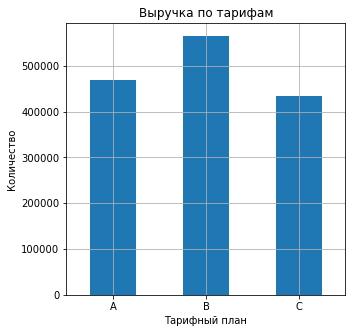

In [114]:
ax = tariff_total.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=0)
plt.title('Выручка по тарифам')
plt.xlabel('Тарифный план') 
plt.ylabel('Количество')
plt.show()

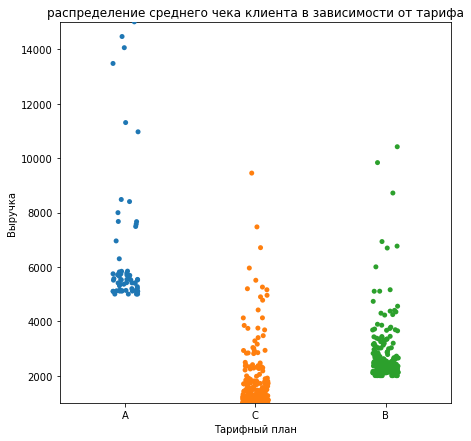

In [115]:
tar = client[['tariff_plan','total']]

plt.figure(figsize=(7, 7))
ax = sns.stripplot(x="tariff_plan", y="total", data=tar)
ax.set(title = 'распределение среднего чека клиента в зависимости от тарифа', ylabel = 'Выручка', xlabel = 'Тарифный план', ylim=(1000,15000))
plt.show()

Видно как на цену влияет абонентская плата.

In [116]:
tariff_total['%'] = tariff_total['total'] / tariff_total['total'].sum()
tariff_total

,total,%
tariff_plan,,
A,468827.2,0.319399
B,565406.5,0.385196
C,433606.4,0.295404


На первом месте тариф В - 40%, потом С - 30% и А - 30%.

Определим выгодный тариф для клиента.Создадим функцию.

In [117]:
df = client.copy()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 522
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  523 non-null    int64         
 1   tariff_plan              523 non-null    object        
 2   month_start              523 non-null    datetime64[ns]
 3   month_user               523 non-null    int64         
 4   month                    523 non-null    object        
 5   nunique_operator         523 non-null    float64       
 6   internal_calls_count     523 non-null    float64       
 7   internal_call_duration   523 non-null    float64       
 8   internal_total_duration  523 non-null    float64       
 9   fl_calls_count           523 non-null    float64       
 10  fl_calls_duration        523 non-null    float64       
 11  fl_total_duration        523 non-null    float64       
 12  cost_tariff              523 non-nul

In [119]:
over_limit = {'A':0.1, 'B':0.15, 'C':0.3}
over_limits = {'A':0.4, 'B':0.5, 'C':0.7}
tariff = {'A':5000, 'B':2000, 'C':1000}
limit = 2000
cost_operators = 100

Функция считает расходы по каждому тарифу для клиента за один месяц и создает самый дешевый тариф для клиента.

In [120]:
def get_best_tariff(df=df):
    user_list = []
    best_tariff_list = []

    for user in df.user_id.unique():
        total_by_user = {i:[] for i in over_limit.keys()}
        temp = df[df['user_id']==user]        
        def in_one_user_df(x):
            cost_by_tariff = {}
            for i in over_limit.keys():
                external = over_limits[i]*x.fl_total_duration
                if x.internal_limit > 0:
                    internal = over_limit[i]*x.internal_limit
                else:
                    internal = 0
                total = external + internal + tariff[i]
                cost_by_tariff[i] = round(total,2)

            for key, value in cost_by_tariff.items():
                total_by_user[key].append(value)
                
        temp['no_column_no_doubt'] = temp.apply(in_one_user_df, axis=1)

        total_by_user = {key:sum(value) for key, value in total_by_user.items()}

        best_tariff = [key for key, value in total_by_user.items() if value == min(total_by_user.values())][0]

        user_list.append(user)
        best_tariff_list.append(best_tariff)

    df_best_tariff = pd.DataFrame({'user_id':user_list, 'best_tariff':best_tariff_list})
    return df_best_tariff

In [121]:
df_best_tariff = get_best_tariff()
df_best_tariff.head()

,user_id,best_tariff
0,166713,C
1,166901,C
2,168193,C
3,168252,B
4,168253,C


In [122]:
df_best_tariff.groupby('best_tariff').agg({'user_id':'nunique'})

,user_id
best_tariff,
A,1
B,8
C,235


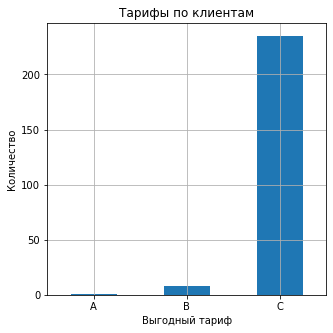

In [123]:
ax = df_best_tariff.groupby('best_tariff').agg({'user_id':'nunique'}).plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=0)
plt.title('Тарифы по клиентам')
plt.xlabel('Выгодный тариф') 
plt.ylabel('Количество')
plt.show()

Предлагает больше всего тариф С.

Сравним тарифы.

In [124]:
df = df.merge(df_best_tariff, on='user_id', how='left')

In [125]:
df.head()

,user_id,tariff_plan,month_start,month_user,month,nunique_operator,internal_calls_count,internal_call_duration,internal_total_duration,fl_calls_count,fl_calls_duration,fl_total_duration,cost_tariff,internal_limit,cost_internal_call,cost_external_call,cost_operators,total,best_tariff
0,166713,A,2019-08-01,11,2019-09-01 00:00:00,1.0,2.0,4.0,4.0,10.0,24.0,26.0,5000,-1996.0,0,10.4,100.0,5110.4,C
1,166713,A,2019-08-01,11,2019-10-01 00:00:00,2.0,0.0,0.0,0.0,16.0,16.0,21.0,5000,-2000.0,0,8.4,200.0,5208.4,C
2,166713,A,2019-08-01,11,2019-11-01 00:00:00,1.0,0.0,0.0,0.0,20.0,117.0,119.0,5000,-2000.0,0,47.6,100.0,5147.6,C
3,166901,A,2019-08-01,11,2019-08-01 00:00:00,4.0,28.0,23.0,30.0,53.0,26.0,31.0,5000,-1970.0,0,12.4,400.0,5412.4,C
4,166901,A,2019-08-01,11,2019-09-01 00:00:00,4.0,106.0,98.0,121.0,148.0,261.0,280.0,5000,-1879.0,0,112.0,400.0,5512.0,C


In [126]:
df_recommendation = df.groupby(['user_id','tariff_plan']).agg({'best_tariff':'unique'}).reset_index()

Создадим функцию,которая считает более выгодный тариф.

In [127]:
def get_recommendation(x):
    dict_params = {'A':3,'B':2, 'C':1}
    dict_params_down = dict(reversed(item) for item in dict_params.items())
    current_tariff = dict_params[x.tariff_plan]
    if (list(x.tariff_plan) == x.best_tariff) :
        return 'nothing'
    else:
        best_tariff = dict_params[str(x.best_tariff[0])]
        if current_tariff > best_tariff:
            return 'decrease_'+ dict_params_down[best_tariff]
        else:
            return 'increase_'+ dict_params_down[best_tariff]

In [128]:
df_recommendation['recommedation'] = df_recommendation.apply(get_recommendation, axis=1)

In [129]:
df_recommendation.drop(['best_tariff'], axis=1, inplace=True)

In [130]:
df_recommendation.head()

,user_id,tariff_plan,recommedation
0,166377,B,decrease_C
1,166391,C,nothing
2,166392,C,nothing
3,166405,B,nothing
4,166406,B,decrease_C


Посмотрим на оптимальные тарифы.

In [131]:
df_recommendation['is_tariff_optimal'] = np.where(df_recommendation['recommedation']=='nothing',
                                                  'optimal','not_optimal')
optimal = df_recommendation.groupby('is_tariff_optimal').agg({'user_id':'nunique'})\
                                                     .rename(columns={'user_id':'cnt_users'})\
                                                     .reset_index()

optimal['share'] = optimal['cnt_users'] / optimal['cnt_users'].sum()

In [132]:
optimal

,is_tariff_optimal,cnt_users,share
0,not_optimal,112,0.459016
1,optimal,132,0.540984


135 клиентов с оптимальным тарифным планом, 126 с не оптимальным.

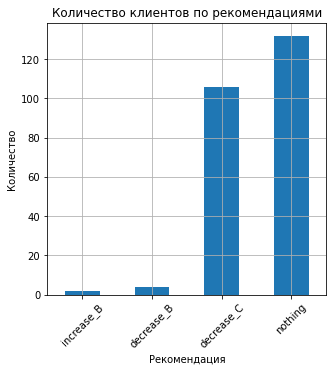

In [133]:
rec = df_recommendation.groupby('recommedation').agg({'user_id':'nunique'})\
                                                .rename(columns={'user_id':'cnt_users'})\
                                                .sort_values('cnt_users')
ax = rec.plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=45)
plt.title('Количество клиентов по рекомендациями')
plt.xlabel('Рекомендация') 
plt.ylabel('Количество')
plt.show()

In [134]:
rec

,cnt_users
recommedation,
increase_B,2
decrease_B,4
decrease_C,106
nothing,132


В понижении тарифа до уровня В нуждаются 3 клиента, в повышении до уровня В 1.

В понижении тарифа до уровня С нуждаются 106 клиентов.

Оптимальный у 132.

Разделим на 2 рекомендации.

In [135]:
df_recommendation[['action', 'optimal_tariff']] = df_recommendation['recommedation'].str.split('_', expand=True)
df_recommendation.head()

,user_id,tariff_plan,recommedation,is_tariff_optimal,action,optimal_tariff
0,166377,B,decrease_C,not_optimal,decrease,C
1,166391,C,nothing,optimal,nothing,None
2,166392,C,nothing,optimal,nothing,None
3,166405,B,nothing,optimal,nothing,None
4,166406,B,decrease_C,not_optimal,decrease,C


In [136]:
df_recommendation.loc[df_recommendation['action']=='nothing','optimal_tariff'] = df_recommendation['tariff_plan']

In [137]:
df_recommendation.head()

,user_id,tariff_plan,recommedation,is_tariff_optimal,action,optimal_tariff
0,166377,B,decrease_C,not_optimal,decrease,C
1,166391,C,nothing,optimal,nothing,C
2,166392,C,nothing,optimal,nothing,C
3,166405,B,nothing,optimal,nothing,B
4,166406,B,decrease_C,not_optimal,decrease,C


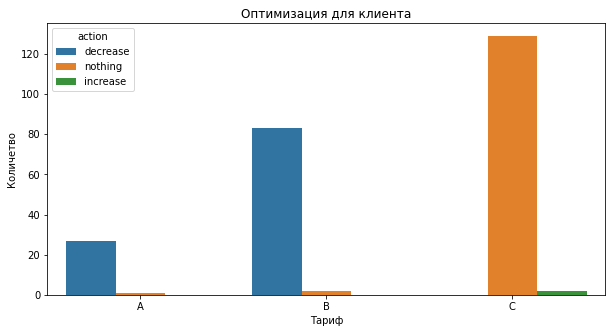

In [138]:
action = df_recommendation.groupby(['tariff_plan','action']).agg({'user_id':'nunique'})\
                                                          .rename(columns={'user_id':'cnt_users'})\
                                                          .reset_index()
plt.figure(figsize=(10, 5)) 
ax = sns.barplot(x='tariff_plan', y='cnt_users', hue='action', data=action)
ax.set(title='Оптимизация для клиента', xlabel='Тариф', ylabel='Количетво')
plt.show()

In [139]:
action

,tariff_plan,action,cnt_users
0,A,decrease,27
1,A,nothing,1
2,B,decrease,83
3,B,nothing,2
4,C,increase,2
5,C,nothing,129


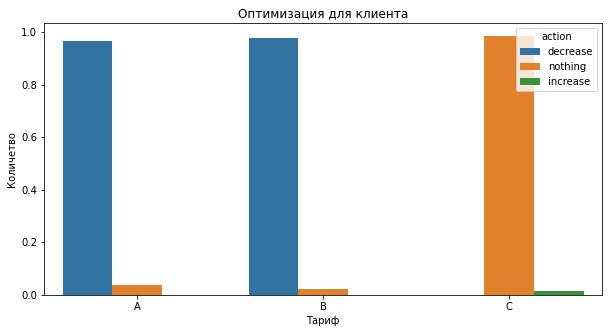

In [140]:
opt = ((df_recommendation.groupby(['tariff_plan','action']).agg({'user_id':'nunique'})/
                                df_recommendation.groupby('tariff_plan').agg({'user_id':'nunique'}))).reset_index()
plt.figure(figsize=(10, 5)) 
ax = sns.barplot(x='tariff_plan', y='user_id', hue='action', data=opt)
ax.set(title='Оптимизация для клиента', xlabel='Тариф', ylabel='Количетво')
plt.show()

In [141]:
opt

,tariff_plan,action,user_id
0,A,decrease,0.964286
1,A,nothing,0.035714
2,B,decrease,0.976471
3,B,nothing,0.023529
4,C,increase,0.015267
5,C,nothing,0.984733


In [142]:
op = df_recommendation.groupby('action').agg({'user_id':'nunique'}).rename(columns={'user_id':'cnt_users'}).reset_index()

In [143]:
op['share'] = op['cnt_users'] / (op['cnt_users'].sum())
op

,action,cnt_users,share
0,decrease,110,0.450820
1,increase,2,0.008197
2,nothing,132,0.540984


Понижение:
- Для общего числа будет оптимально 45%(109 клиента) перехода.
- Для тарифа А будет оптимально 96%(26 клиентов) перехода.
- Для тарифа В будет оптимально 97%(83 клиентов) перехода.

Повышение:
- Для общего числа будет оптимально (1 клиентов) перехода.
- Для тарифа С будет оптимально (1 клиентов) перехода.

Оптимальный тариф:
- для общего числа будет оптимально 54%(132 клиентов) перехода.
- Для тарифа В будет оптимально 2%(2 клиентов) перехода.
- Для тарифа С будет оптимально 99%(129 клиентов) перехода.

**Посчитаем потерю выручки.**

In [144]:
df.drop(['best_tariff'], axis=1, inplace=True)

In [145]:
df = df.merge(df_recommendation[['user_id','is_tariff_optimal','action','optimal_tariff']],on='user_id', how='left')

In [146]:
df['cost_tariff_monthly_optimal'] = df['optimal_tariff'].map(tariff)

In [147]:
df['cost_internal_call_optimal'] = df.apply(lambda x:
                                            round(over_limit[x.optimal_tariff] * x.internal_limit,2)
                                                    if x.internal_limit > 0
                                                    else 0, axis=1)

df['cost_external_call_optimal'] = df.apply(lambda x: round(over_limits[x.optimal_tariff] * x.fl_total_duration,2), axis=1)

df['cost_all_total_optimal'] = (df['cost_operators'] + df['cost_tariff_monthly_optimal'] + 
                                df['cost_internal_call_optimal'] + df['cost_external_call_optimal'])

Выручка за весь период.

In [148]:
before = df['total'].sum()
before

1467840.1

Выручка после перехода.

In [149]:
after = df['cost_all_total_optimal'].sum()
after

1079511.6

Относительное различие.

In [150]:
dif = (before - after) / before * 100
dif

26.455776756609932

Посмотрим на выручку после оптимизации на графиках.

In [151]:
df.groupby('tariff_plan').agg({'cost_all_total_optimal':'sum'})

,cost_all_total_optimal
tariff_plan,
A,251372.1
B,396995.1
C,431144.4


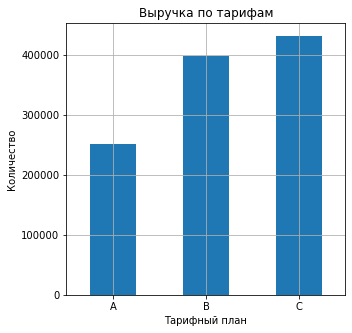

In [152]:
ax = df.groupby('tariff_plan').agg({'cost_all_total_optimal':'sum'}).plot(kind='bar', figsize=(5, 5), legend=False, grid=True)
plt.xticks(rotation=0)
plt.title('Выручка по тарифам')
plt.xlabel('Тарифный план') 
plt.ylabel('Количество')
plt.show()

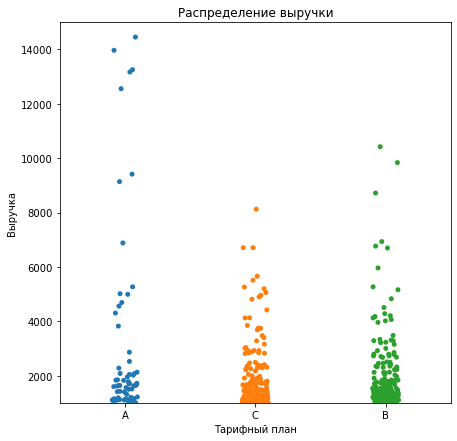

In [153]:
plt.figure(figsize=(7, 7))
ax = sns.stripplot(x="tariff_plan", y="cost_all_total_optimal", data=df)
ax.set(title = 'Распределение выручки', ylabel = 'Выручка', xlabel = 'Тарифный план', ylim=(1000,15000))
plt.show()

Потеряется 27% выручки. Выручка до 1396047 и после 1017474.

## Проверка гипотез.

**Проверка гипотезы: "Проверка различия в средней выручке при смене тарифа на оптимальный тариф."**

Тут мы сравниваем среднюю выручку по действующим тарифам с средней выручкой по оптимальным тарифам.
- H0(нуливая гипотеза) - средняя выручка не различается.

- H1(альтернотивная гипотеза) - средняя выручка различается.

Пороговое значение alpha (критический уровень статистической значимости) зададим 5%.

In [154]:
alpha = 0.05 

results = st.ttest_ind(
    df['total'], 
    df['cost_all_total_optimal'])

print('p-значение: {0:.2f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00
Отвергаем нулевую гипотезу


Средняя выручка при переходе на оптимальный тариф отличается. Отвергаем нулевую гипотезу

**Проверка гипотезы: "Проверка различия выручки тарифов А и В."**

H0(нуливая гипотеза) - выручка в тарифе А не отличается от тарифа В.

H1(альтернотивная гипотеза) - выручка в тарифе А отличается от тарифа В.

Пороговое значение alpha (критический уровень статистической значимости) зададим 5%.

In [155]:
tar_A = df.query("tariff_plan == 'A'")['cost_all_total_optimal']
tar_A.sum()

251372.1

In [156]:
tar_B = df.query("tariff_plan == 'B'")['cost_all_total_optimal']
tar_B.sum()

396995.1

Для двух выборок мы получили в сумме в тарифе А - 277002.7, в тарифе В - 435268.7

In [157]:
alpha = 0.05

results = st.ttest_ind(tar_A, tar_B)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1379348658213707e-05
Отвергаем нулевую гипотезу


Выручка в тарифах А и В различается. Отвергаем нулевую гипотезу.

## Вывод.

Данные за период 2019-08-01 - 2019-11-27 (почти 4 месяца). Всего клиентов за весь период 290, активных за послений месяц 244. -46 клиентов(15.8%). Тариф А больше всего подключили в 10 месяце, тариф В в 10 и 8, тариф С в 8 и 9. По общему числу подключений больше в 8 месяце.

Из 46 ушедших:

- Тариф А(5000₽) в 8 месяце из 26 клиентов ушли 2, в 9 месяце пришли 16 и 2 ушли. Всего 4
- Тариф В(2000₽) в 8 месяце из 91 клиентов ушли 6, в 9 месяце пришли 77 и 8 ушли, в 10 месяце пришли 93 и 2 ушли. Всего 16.
- Тариф С(1000₽) в 8 месяце из 141 клиентов ушли 15, в 9 месяце пришли 138 и 9 ушли, в 10 месяце пришли 116 и 2 ушли. Всего 26. Больше всего клиентов ушло в 8 месяце(23), потом в 9(19) и в 8(4).
- 37 клиентов пользовались входящими вызовами, 35 исходящими;
- 21 клиент пользовался внутренними вызовами, 46 внешними(все);
- 35 клиентов пропускали вызов;
- длительность звонка среднее 2 минуты, медиана 4 минуты, минимум 1 минута, максимум 42 минут
- длительность звонка с ожиданием среднее 4 минуты, медиана 2 минуты, минимум 1 минута, максимум 45 минут;
- количество звонков среднее 4, медиана 2, минимум 1, максимум 44.

**Статистика по клиентам, которые переплачивают**

132(54,5%) клиента с оптимальным тарифным планом, 110(45,5%) не оптимальный.

В понижении тарифа до уровня В нуждаются 3 клиента;

В повышении до уровня В нуждается 1 клиент;

В понижении тарифа до уровня С нуждаются 106 клиентов.

- Выручка до 1396047 и после 1017474 оптимизации. Потеряется 27% выручки.
- На первом месте тариф В-565406.5(40%), потом С-416683(30) и А-413957.6(30).

Клиенты по тарифам:
- A 1
- B 6
- C 235
Оптимизация тарифов.

Для тарифа А:
- будет оптимально понижение 96%(26 клиентов)

Для тарифа В:
- будет оптимально понижение 97%(83 клиента)
- оптимальный 2%(2 клиента)

Для тарифа С:
- будет оптимально повышение для 1 клиента
- оптимальный для 1 клиента.

Средняя выручка различается - 27%.

**Предоставляю клиенту список клиентов с неоптимальным тарифом**

In [158]:
not_optimal = df_recommendation.query('is_tariff_optimal == "not_optimal"')

In [159]:
not_optimal['user_id']

0      166377
4      166406
5      166407
6      166428
8      166485
        ...  
234    168500
236    168562
238    168579
239    168583
242    168603
Name: user_id, Length: 112, dtype: int64